In [2]:
import numpy as np
import matplotlib.pyplot

# importing the training data
XX = np.load("smalldata/encodings/X.npy")
k = 10            # k is a fold number
N = XX.shape[0]

train = [True]*N
train = np.array(train)
train[::k] = False
test = [False]*N
test = np.array(test)
test[::k] = True

X = XX[train,:-1]
Y = XX[train,-1]
X_test = XX[test,:-1]
Y_test = XX[test,-1]


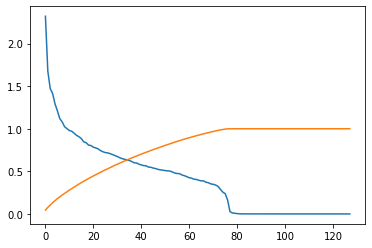

In [4]:
# finding PCA
X_avg = np.mean(X, axis=0)
n = X_avg.shape[0]
X = X - X_avg
U, S, VT = np.linalg.svd(X / np.sqrt(n), full_matrices=False)
cdS = np.cumsum(S) / np.sum(S)  # Cumulative energy
r90 = np.min(np.where(cdS > 0.9))

#plots
matplotlib.pyplot.plot(range(len(S)),S)
matplotlib.pyplot.plot(range(len(S)),cdS)

In [5]:
from sklearn.linear_model import LinearRegression

Mse = []
for pca_n in range(1,r90+1):
    Xpc = X @ VT[0:pca_n].T
    Xpc_test = X_test @ VT[0:pca_n].T
    reg = LinearRegression().fit(Xpc, Y)
    mse = np.sqrt(np.sum(np.power(reg.predict(Xpc_test) - Y_test,2))/Y_test.shape[0])
    Mse.append(mse)

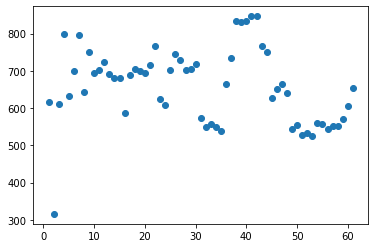

In [6]:
matplotlib.pyplot.plot(range(1,r90+1),Mse,"o")

In [7]:
Mse[:4]

[615.3602882623528, 316.1436100965999, 611.9594555345794, 799.9498527850672]